### Import the main Libraries

In [4]:
## Most Important
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## other
import missingno as msno
import os

## Model Selection
from sklearn.model_selection import train_test_split

## Metrics
from sklearn.metrics import mean_squared_error, r2_score

## Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector

## Models
from sklearn.linear_model import LinearRegression, SGDRegressor


### Load the Data ana Look at the big picture

In [7]:
## Read the csv file using pandas
# file_path = os.path.join(os.getcwd(), 'hous/content/housing.csving.csv')
df_housing = pd.read_csv("/content/housing.csv")

## show the head of the DF
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
## check the info (nulls and datatypes)
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
## some statistics of the DF --> target column is (median_house_value)
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
## check the nulls
df_housing.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


* > `Comment: It seems that Dataset is a contains 20640 instances and only 207 null values in total_bedrooms feature, and also all datatypes is float64 as they are continuous numerical features except the (ocean_proximity) column which is nominal categorical Feature`

### Exploratory Data Analysis (EDA)

### `Univariate Visualization`

categories of (ocean_proximity) --- 
 ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64
********************************************************************************


/tmp/ipython-input-3487950539.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = ocean_values[i]


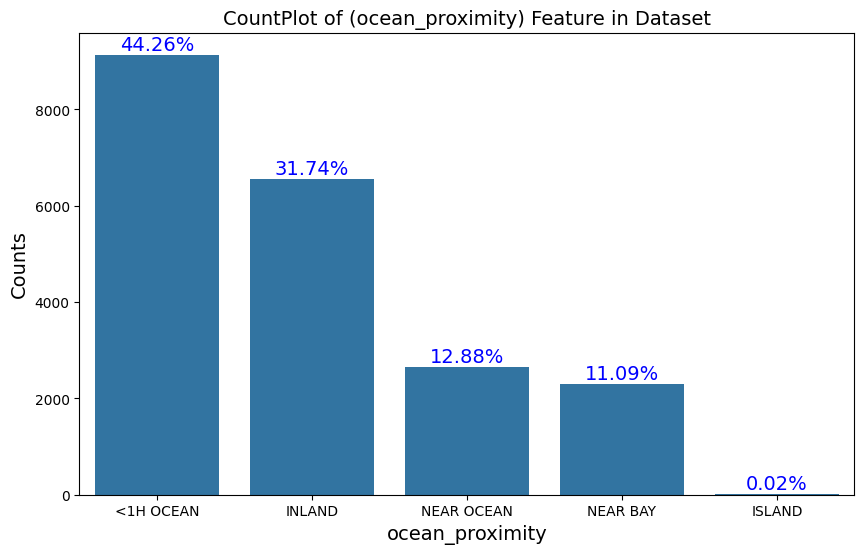

In [11]:
## Check the Distribution of (ocean_proximity) Feature in Dataset
ocean_values = df_housing['ocean_proximity'].value_counts()
print('categories of (ocean_proximity) --- \n', ocean_values)
print('**'*40)

## plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='ocean_proximity', data=df_housing, order=ocean_values.index)  ## ordered
plt.title('CountPlot of (ocean_proximity) Feature in Dataset', fontsize=14, c='k')
plt.xlabel('ocean_proximity', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')

## showing the percenatge
for i in range(ocean_values.shape[0]):
    count = ocean_values[i]
    strt='{:0.2f}%'.format(100*count / df_housing.shape[0])
    plt.text(i, count+100, strt, ha='center', color='blue', fontsize=14)

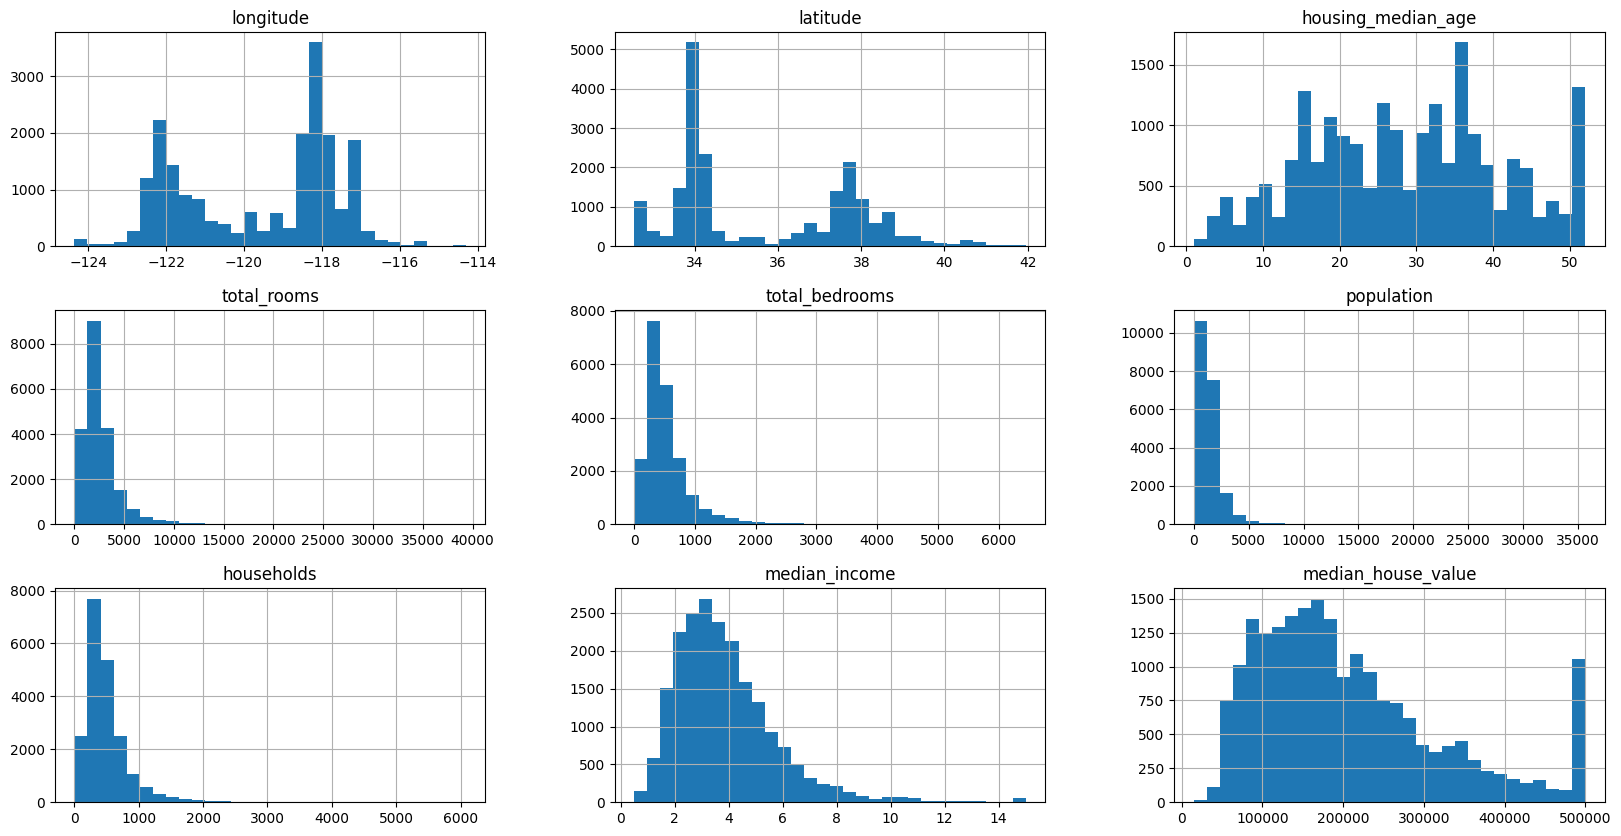

In [12]:
## Histogram Distribution of Numerical Variables in Dataset
df_housing.hist(bins=30, figsize=(20,10))
plt.show()

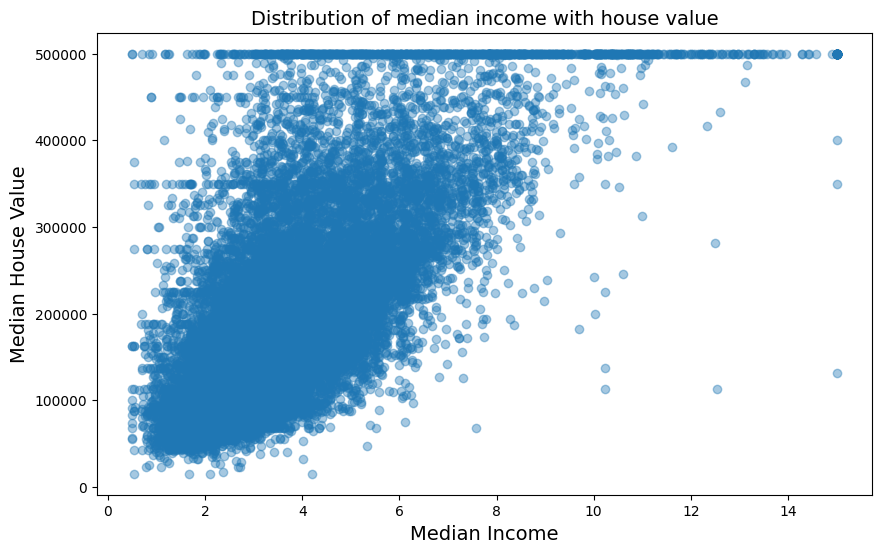

In [13]:
## scatte plot with important features (median_income) with the target (median_house_value)
plt.figure(figsize=(10, 6))
plt.scatter(df_housing['median_income'], df_housing['median_house_value'], alpha=0.4)
plt.title('Distribution of median income with house value', fontsize=14, c='k')
plt.xlabel('Median Income', fontsize=14, c='k')
plt.ylabel('Median House Value', fontsize=14, c='k')
plt.show()

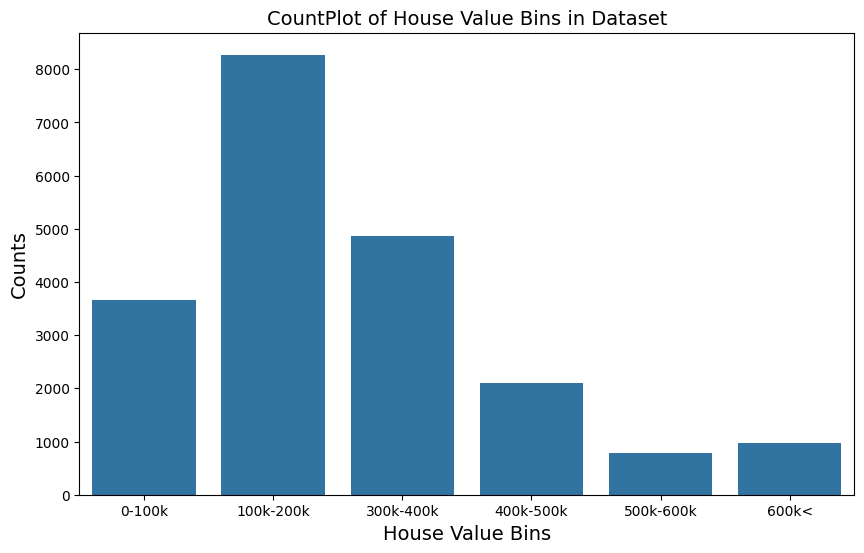

In [14]:
## Try for (median_house_value) to convert it to chunks (bins)
## Cut this numerical feature to categorical for its values to be in range will be in the same category
## In the following example -- any value between range (0-100k) will be the same category, I name it (0-100k)
house_value_bins = pd.cut(x=df_housing['median_house_value'],
                          bins=[0, 100000, 200000, 300000, 400000, 500000, np.inf],
                          labels=['0-100k', '100k-200k', '300k-400k', '400k-500k', '500k-600k', '600k<'])

## countplot for the above chunks
plt.figure(figsize=(10, 6))
sns.countplot(x=house_value_bins)
plt.title('CountPlot of House Value Bins in Dataset', fontsize=14, c='k')
plt.xlabel('House Value Bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show()

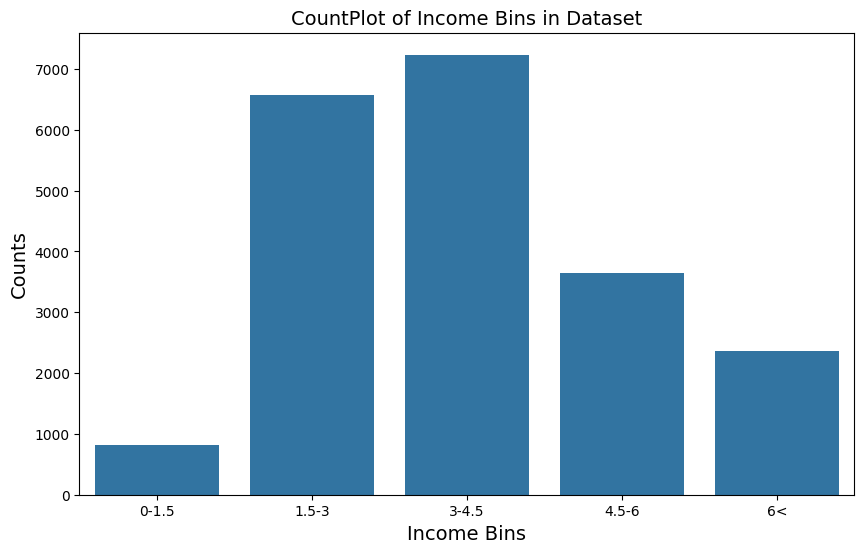

In [15]:
## Let's try the same above code for (median_income), I think it is very important feature
income_bins = pd.cut(x=df_housing['median_income'],
                          bins=[0, 1.5, 3, 4.5, 6, np.inf],
                          labels=['0-1.5', '1.5-3', '3-4.5', '4.5-6', '6<'])

## countplot for the above chunks
plt.figure(figsize=(10, 6))
sns.countplot(x=income_bins)
plt.title('CountPlot of Income Bins in Dataset', fontsize=14, c='k')
plt.xlabel('Income Bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show()

* > `Comment: It seems that the (<1H ocean) is about the half of the dataset the data is biased to this category, someone can think to split the data according to this column using (startified) method if we found that this column is very important, we will discuss that later, Also, it seems that the Distribution of most of features are right skewed (exponential distribution) and it is known that the best distribution to be passed to the model is Normal Distribution, we will go further with these features to know how to deal with these skewed distrbution later, Also the majority of house_value is between (100k-200k), Also the majority of median_income is between (3-4.5), someone can change his mind and split the dataset using (startified) method according to the most important feature as I think till now which is (median_income) but use (income_bins) as the stratified method requires categorical features not numerical`

### `Bivariate Visualization`

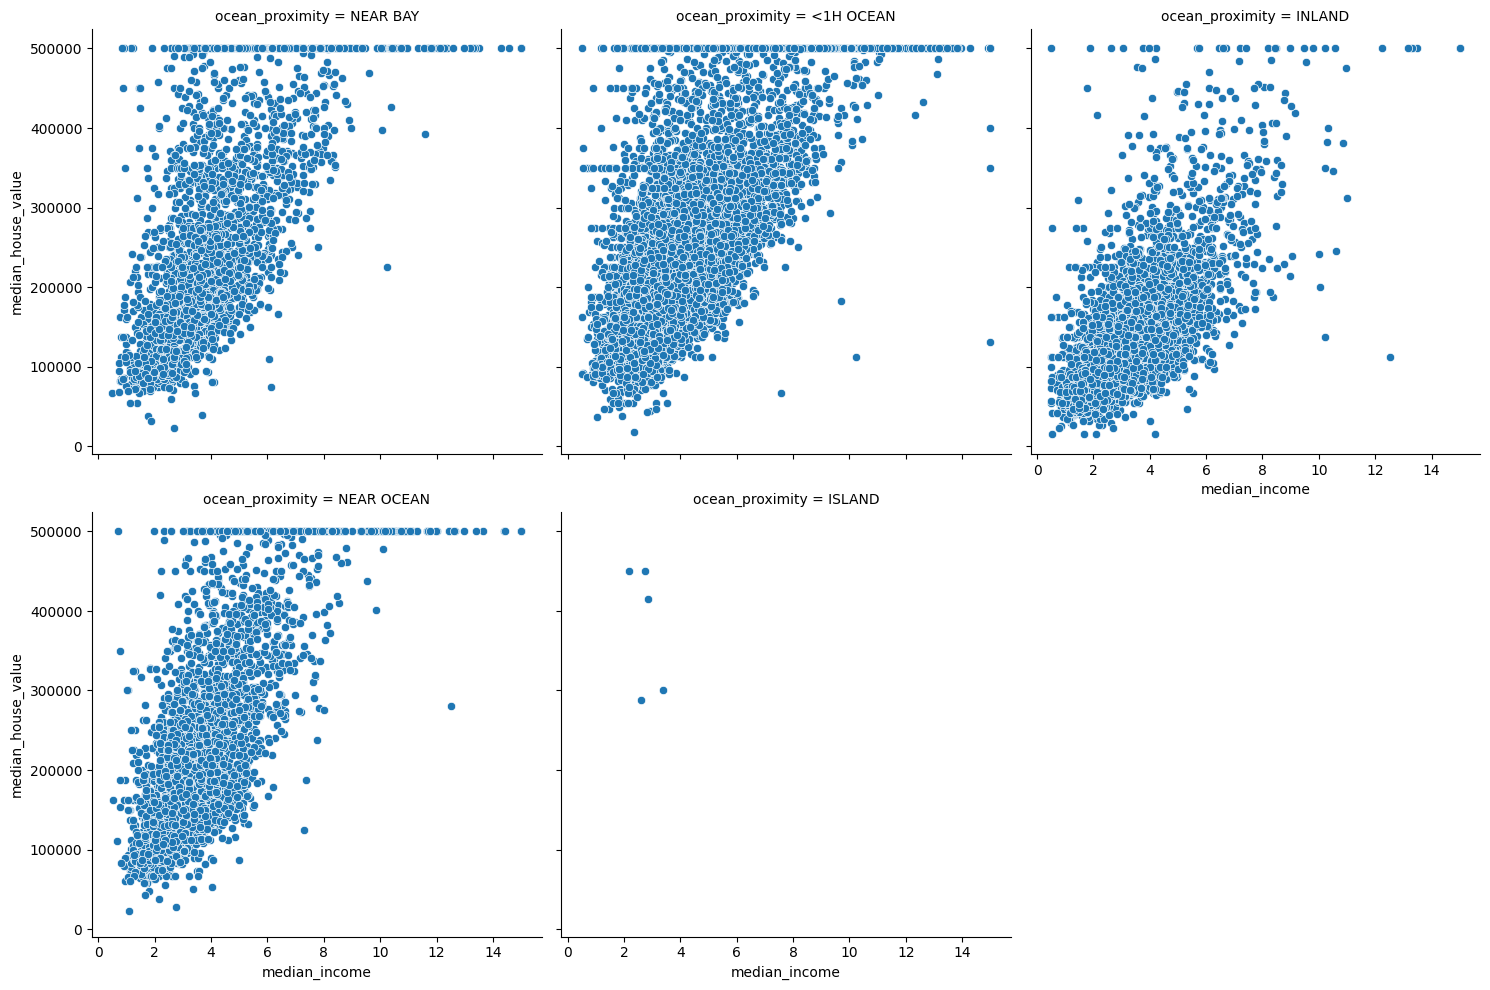

In [16]:
## Scatter plot with (median_income) and (median_house_value) at each (ocean_proximity)
sns.relplot(x='median_income', y='median_house_value', data=df_housing, kind='scatter',
            col='ocean_proximity', col_wrap=3)
plt.show()

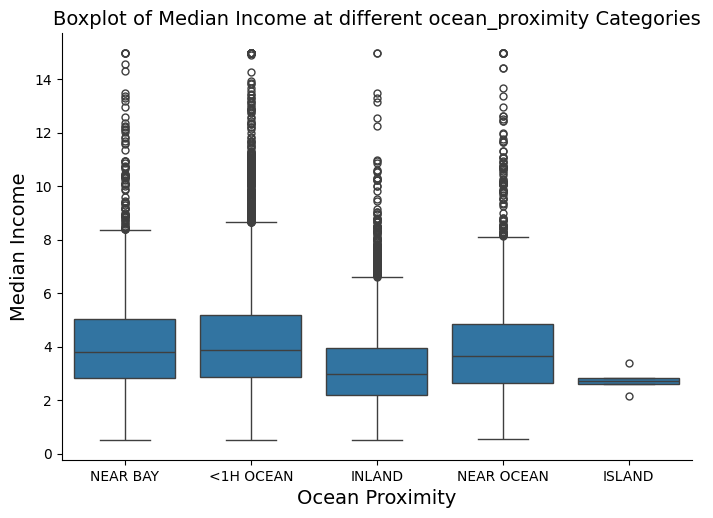

In [17]:
## Check the Boxplot of the (median_income) at different categories of (ocean_proximity)
sns.catplot(y='median_income', x='ocean_proximity', data=df_housing, kind='box', height=5, aspect=1.4)
plt.title('Boxplot of Median Income at different ocean_proximity Categories', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Median Income', fontsize=14, c='k')
plt.show()

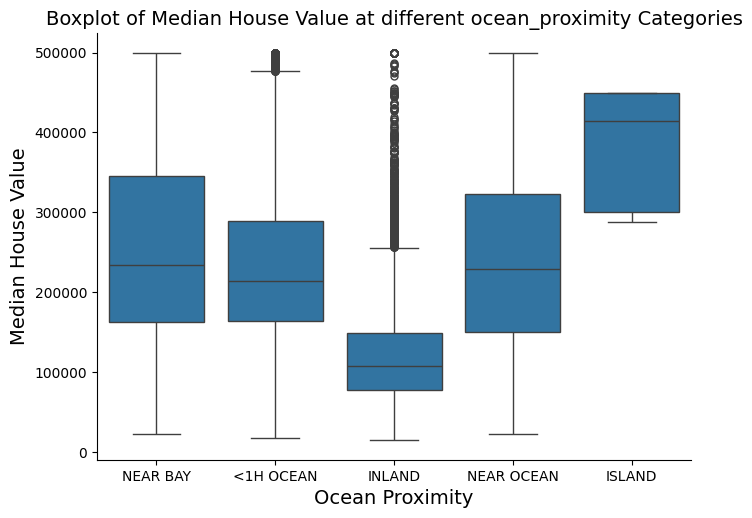

In [18]:
## Check the Boxplot of the (median_house_value) at different categories of (ocean_proximity)
sns.catplot(y='median_house_value', x='ocean_proximity', data=df_housing, kind='box', height=5, aspect=1.4)
plt.title('Boxplot of Median House Value at different ocean_proximity Categories', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Median House Value', fontsize=14, c='k')
plt.show()

* > `Comment: It seems that the Distribution of median_income is almost the same at ocean_proximity categories, Also, it seems that the INLAND median_income and median_house value is less than other categories and it makes sense `

### `Multivariate Visualization`

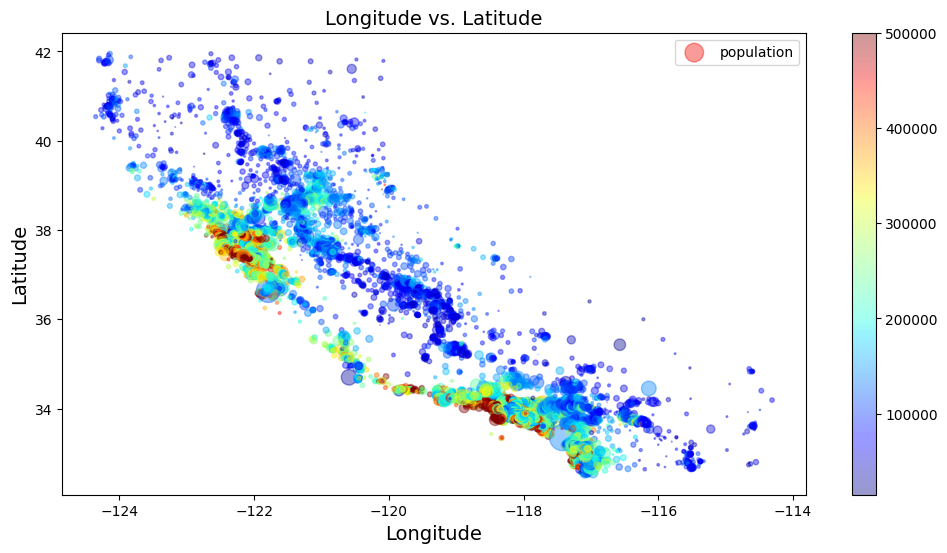

In [19]:
## Scatter plot for (longitued & latitued), and add population as the size of the point and the color as (house_value)
plt.figure(figsize=(12, 6))
sc = plt.scatter(df_housing['longitude'], df_housing['latitude'], s=df_housing['population']/100,
                   alpha=0.4, c=df_housing['median_house_value'], cmap=plt.get_cmap('jet'), label='population')
plt.colorbar(sc)
plt.xlabel('Longitude', fontsize=14, c='k')
plt.ylabel('Latitude', fontsize=14, c='k')
plt.title('Longitude vs. Latitude', fontsize=14, c='k')
plt.legend()
plt.show()

* > `Comment: IIt seems that prices is higher near the ocean than other zones, and also these araes have higher population`

### `Check the Correlation between the Features and the Target`

In [22]:
## Correlatio (pearson correlation)
df_housing.corr(numeric_only=True)['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population,-0.024650
longitude,-0.045967
latitude,-0.144160


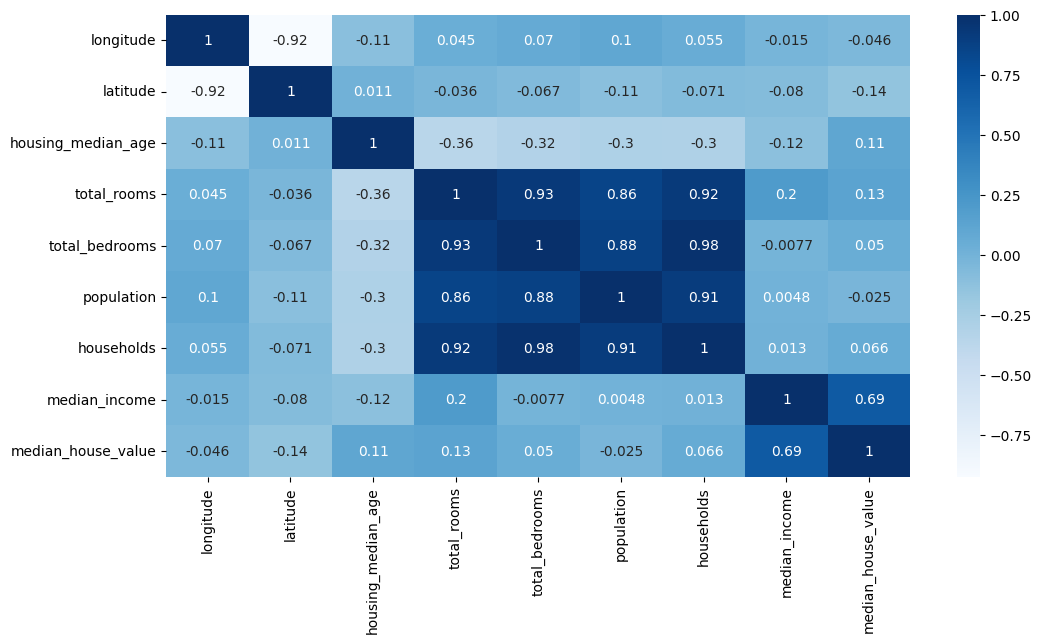

In [24]:
## you can show this as heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_housing.corr(numeric_only=True), annot=True, cmap='Blues')  ## symmetric matrix
plt.show()

* > `Comment: It seems that the most correlated Feature with target is (median_income) as I predict that, and feature like (households & population) are less correlated`

### Feature Engineering
`Try to add some features, thinking that it will be more useful and more correlated to the target`

In [25]:
## Try to make some Feature Engineering --> Feature Extraction --> Add the new column to the main DF
df_housing['rooms_per_household'] = df_housing['total_rooms'] / df_housing['households']
df_housing['bedroms_per_rooms'] = df_housing['total_bedrooms'] / df_housing['total_rooms']
df_housing['population_per_household'] = df_housing['population'] / df_housing['households']

In [27]:
## check the correlation again
df_housing.corr(numeric_only=True)['median_house_value'].sort_values(ascending=False)  ## some progress for out new features (very good)

,median_house_value
median_house_value,1.000000
median_income,0.688075
rooms_per_household,0.151948
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population_per_household,-0.023737
population,-0.024650
longitude,-0.045967


* > `Comment:Some progress for out new features (very good), Strong correlation`

### `Split the Dataset`
`I will split the Dataset using ordinary method (random method) not (Stratified method)`

In [28]:
## Split the Whole dataset to features and target
X = df_housing.drop(columns=['median_house_value'], axis=1)  ## features
y = df_housing['median_house_value']  ## target

In [29]:
## Random split the dataset to two sets (train_set, valid_set, test_set)
## Firstly split to (train_full_set, test_set) then split (train_full_set) to (train_set, valid_set)
## Firstly
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.15, random_state=123, shuffle=True)
## secondly
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=125, shuffle=True)

## check shape
print('X_train shape -- ', X_train.shape)
print('y_train shape -- ', y_train.shape)
print('X_valid shape -- ', X_valid.shape)
print('y_valid shape -- ', y_valid.shape)
print('X_test shape -- ', X_test.shape)
print('y_test shape -- ', y_test.shape)

X_train shape --  (14035, 12)
y_train shape --  (14035,)
X_valid shape --  (3509, 12)
y_valid shape --  (3509,)
X_test shape --  (3096, 12)
y_test shape --  (3096,)


-------

* `Notes in sklearn, Read Crarefully:` <br />
    * `.fit --> means that the instance you created is trying to learn or train`
    * `.transform --> means that the instance you created has learned and now time to apply what it learned by trasnforming`
    * `.fit_transform --> means the two above steps in one step, and don't use this method except with training data`
    * `We fit to train the data, and after it learns we transform (train, valid, test)`
    * `In other meaning --> (.fit) then (.transform) to training data or (fit_transform) in one step`
    * `In other meaning --> only (.transform) to other data after learing to training data`

-----

### `Dealing with nulls`

In [30]:
## Separete the columns according to type (numerical or categorical)
num_cols = [col for col in  X_train.columns
             if X_train[col].dtype in ['float64', 'int64']]

categ_cols = [col for col in  X_train.columns
                if X_train[col].dtype not in ['float64', 'int64']]

print('Numerical Columns : \n', num_cols)
print('**'*30)
print('Categorical Columns : \n', categ_cols)

Numerical Columns : 
 ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedroms_per_rooms', 'population_per_household']
************************************************************
Categorical Columns : 
 ['ocean_proximity']


In [31]:
## I choose to impute the nulls with median --> using SimpleImputer
imputer = SimpleImputer(strategy='median')  ## define an instance

## fit and transform to training data (only Numerical)
X_train_filled = imputer.fit_transform(X_train[num_cols])

## transform valid and test datasets
X_valid_filled = imputer.transform(X_valid[num_cols])
X_test_filled = imputer.transform(X_test[num_cols])

### `Standardize the Dataset`

In [32]:
## using StandardScaler for each Feature to be (mean=0, std=1)
## This techniques helps for better training and to converge faster and put all features in the same scale
scaler = StandardScaler()  ## define an instance

## fit and transform to training data (only Numerical)
X_train_scaled = scaler.fit_transform(X_train_filled)

## transform valid and test datasets
X_valid_scaled = scaler.transform(X_valid_filled)
X_test_scaled = scaler.transform(X_test_filled)

### `Pipeline for Numerical Features  --  I will use it in this Project`
`Building a pipeline is much easier and better while inference at new dataset`

In [33]:
## Building a pipeline for numerical variables
num_pipline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

## deal with (num_pipline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train_num = num_pipline.fit_transform(X_train[num_cols])
X_valid_num = num_pipline.transform(X_valid[num_cols])
X_test_num = num_pipline.transform(X_test[num_cols])  ## much easier and much better

### `Categorical Features`
`Categorical Features should be encoed before being passed to the Model, there are more than one type of encoding`
* `Label Encoding: mapping categories to numbers start from 0 to the length of categories and map these values in one column`
* `Ordinal Encoding: mapping ordinal categories start from 0 to the length of categories but orderd 0<1<2 ...`
* `OHE = One Hot Encoding: mapped to multiple columns, column for each category, each column contains ones when this category is mentioned`

In [34]:
## Let's use here for (ocean_proximity) --> use LabelEncoder (Try to use OHE)
lbl_encoder = LabelEncoder()    ## define an instance
X_train_encoded = lbl_encoder.fit_transform(X_train[categ_cols].values[:, 0])  ## for train

X_valid_encoded = lbl_encoder.transform(X_valid[categ_cols].values[:, 0])
X_test_encoded = lbl_encoder.transform(X_test[categ_cols].values[:, 0])

In [39]:
## Define pipeline for categorical columns --> use OneHotEncoder = OHE
categ_pipeline = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('OHE', OneHotEncoder(sparse_output=False))]
)


## deal with (categ_pipeline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train_categ = categ_pipeline.fit_transform(X_train[categ_cols])
X_valid_categ = categ_pipeline.transform(X_valid[categ_cols])
X_test_categ = categ_pipeline.transform(X_test[categ_cols])  ## much easier and much better

### `Get all Together`
* `Now we have outputs from Numerical Pipeline and Cateforical Pipeline`
* `We have two solutions:`
    * `Conactenate the Features (Numerical after processing) and (Encoded Categorical)`
    * `You can use (FeatureUnion or ColumnTransformer) provided in sklearn`

In [41]:
## We can get much much easier like the following
## numerical pipeline
num_pipeline = Pipeline([
                    ('selector', DataFrameSelector(num_cols)),    ## select only these columns
                    ('imputer', SimpleImputer(strategy='median')),
                    ('scaler', StandardScaler())])

## categorical pipeline
categ_pipeline = Pipeline(steps=[
            ('selector', DataFrameSelector(categ_cols)),    ## select only these columns
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('OHE', OneHotEncoder(sparse_output=False))])

## concatenate both two pipelines
total_pipeline = FeatureUnion(transformer_list=[
                                ('num_pip', num_pipeline),
                                ('categ_pipeline', categ_pipeline)])

## deal with (total_pipeline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train_final = total_pipeline.fit_transform(X_train)
X_valid_final = total_pipeline.transform(X_valid)
X_test_final = total_pipeline.transform(X_test)                 ### Every thing is processed :D

### `Building ML Models`

`Evaluation Metric: RMSE`

### `LinearRegression`

In [42]:
## define the model
lin_reg = LinearRegression()
lin_reg.fit(X_train_final, y_train)  ## train

LinearRegression()

In [43]:
## prediction
y_pred_train_lin = lin_reg.predict(X_train_final)  ## predict the training data
y_pred_valid_lin = lin_reg.predict(X_valid_final)  ## predict the training data

## RMSE
rmse_train_lin = (mean_squared_error(y_train, y_pred_train_lin))**0.5
rmse_valid_lin = (mean_squared_error(y_valid, y_pred_valid_lin))**0.5

## R2 score
r2_train_lin = r2_score(y_train, y_pred_train_lin)
r2_valid_lin = r2_score(y_valid, y_pred_valid_lin)


print(f'RMSE for training set using LinearRegression -- {rmse_train_lin:.3f}')
print(f'RMSE for validating set using LinearRegression -- {rmse_valid_lin:.3f}')
print('**'*40)
print(f'R2 Score for training set using LinearRegression -- {r2_train_lin:.3f}')
print(f'R2 Score for validating set using LinearRegression -- {r2_valid_lin:.3f}')      ## not bad

RMSE for training set using LinearRegression -- 67603.152
RMSE for validating set using LinearRegression -- 68286.294
********************************************************************************
R2 Score for training set using LinearRegression -- 0.655
R2 Score for validating set using LinearRegression -- 0.650


### `SGDRegression`

In [44]:
## define the model --> ## initialize some random Hyperparameter --> we will tune later
sgd_reg = SGDRegressor(penalty=None, eta0=0.001, shuffle=True, max_iter=10000)
sgd_reg.fit(X_train_final, y_train)  ## train the model

SGDRegressor(eta0=0.001, max_iter=10000, penalty=None)

In [45]:
## prediction
y_pred_train_sgd = sgd_reg.predict(X_train_final)  ## predict the training data
y_pred_valid_sgd = sgd_reg.predict(X_valid_final)  ## predict the training data

## RMSE
rmse_train_sgd = (mean_squared_error(y_train, y_pred_train_sgd))**0.5
rmse_valid_sgd = (mean_squared_error(y_valid, y_pred_valid_sgd))**0.5

## R2 score
r2_train_sgd = r2_score(y_train, y_pred_train_sgd)
r2_valid_sgd = r2_score(y_valid, y_pred_valid_sgd)


print(f'RMSE for training set using SGDRegression -- {rmse_train_sgd:.3f}')
print(f'RMSE for validating set using SGDRegression -- {rmse_valid_sgd:.3f}')
print('**'*40)
print(f'R2 Score for training set using SGDRegression -- {r2_train_sgd:.3f}')
print(f'R2 Score for validating set using SGDRegression -- {r2_valid_sgd:.3f}')         ## not bad

RMSE for training set using SGDRegression -- 67717.433
RMSE for validating set using SGDRegression -- 68321.356
********************************************************************************
R2 Score for training set using SGDRegression -- 0.654
R2 Score for validating set using SGDRegression -- 0.650


----------